In [10]:
import json
def get_tr_vl_ts_list(dataset_dtl,fold=0):

    with open(dataset_dtl, 'r') as f:
        fold_data = json.load(f)
    test_list = []
    for name in fold_data['test_files']:
        test_list.append(name.split('.nii.gz')[0])
    # test_list = [n.lower() for n in test_list]

    train_list =[]
    for name in fold_data['cross_validation'][fold]['train_files']:
        train_list.append(name.split('.nii.gz')[0])
    # train_list = [n.lower() for n in train_list]


    val_list=[]
    for name in fold_data['cross_validation'][fold]['validation_files']:
        val_list.append(name.split('.nii.gz')[0])
    # val_list = [n.lower() for n in val_list]
    
    return train_list,val_list,test_list

In [11]:
from joblib import load
import os
import shap
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
def get_x_test(dataset_dtl_path,fold,data,feature_list):
    train_list,val_list,test_list = get_tr_vl_ts_list(dataset_dtl=dataset_dtl_path,fold=fold)
    train_val_data = data[data['Name'].isin(val_list+train_list)]

    # Use train and val data to build scalar
    standard_scaler = StandardScaler()
    train_val_data.drop(columns=['Center','Name','Label'])
    x_train_val_raw = train_val_data.drop(columns=['Center','Name','Label'])
    y_train_val = train_val_data['Label']
    standard_scaler.fit_transform(x_train_val_raw)

    test_data = data[data['Name'].isin(test_list)]
    x_test_raw = test_data.drop(columns=['Center','Name','Label'])
    y_test = test_data[["Label"]]
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test_raw),columns=x_test_raw.columns)
    x_test = x_test_scaled[feature_list]
    x_test = x_test[feature_list]
    return x_test

Setting features

In [13]:
feature_dim = '2D'
train_test_info = 'Train_Test_4'
if feature_dim=='2D':
    if train_test_info =='Train_Test_4':
        # Test 4
        feature_list = [
        'skewness-Laws R5S5',
        'Collage_kurt_MaximalCorrelationCoefficient_1_nb_4_ws_5',
        'Collage_skew_InformationMeasureOfCorrelation2_1_nb_8_ws_3',
        'Collage_kurt_Contrast_1_nb_8_ws_7',
        'Collage_median_MaximalCorrelationCoefficient_1_nb_32_ws_3',
        'Collage_skew_Correlation_1_nb_16_ws_5',
        'Collage_skew_MaximalCorrelationCoefficient_1_nb_4_ws_3',
        'Collage_skew_SumVariance_1_nb_8_ws_5',
        'median-Laws E5L5',
        'Collage_skew_Entropy_1_nb_16_ws_7',
        'skewness-Laws S5E5',
        'skewness-Laws W5L5',
        'Collage_skew_DifferenceEntropy_1_nb_4_ws_3',
        'Collage_var_Contrast_1_nb_8_ws_7',
        'Collage_kurt_SumEntropy_1_nb_16_ws_5',
        ]
    elif train_test_info =='Train_Test_3':
        # test3
        feature_list = ['Collage_skew_InformationMeasureOfCorrelation2_1_nb_8_ws_3',
        'skewness-Laws S5E5',
        'skewness-Laws R5S5',
        'Collage_skew_InformationMeasureOfCorrelation2_1_nb_16_ws_5',
        'Collage_skew_Correlation_1_nb_8_ws_5',
        'median-Laws E5L5',
        'median-Laws W5S5',
        'Collage_skew_MaximalCorrelationCoefficient_1_nb_4_ws_3']
    elif train_test_info =='Train_Test_2':
        # test2
        feature_list = ['Collage_kurt_MaximalCorrelationCoefficient_1_nb_4_ws_5',
        'median-Laws E5L5',
        'Collage_skew_InformationMeasureOfCorrelation2_1_nb_8_ws_3',
        'Collage_var_InformationMeasureOfCorrelation2_1_nb_16_ws_3',
        'skewness-Laws R5S5',
        'Collage_skew_MaximalCorrelationCoefficient_1_nb_4_ws_3',
        'skewness-Laws S5E5',
        'median-Laws W5S5',
        'Collage_kurt_MaximalCorrelationCoefficient_1_nb_4_ws_7',
        'Collage_median_SumEntropy_1_nb_8_ws_3',
        'Collage_kurt_SumEntropy_1_nb_16_ws_5',
        'Collage_skew_SumVariance_1_nb_4_ws_7']
    elif train_test_info =='Train_Test_1':
        feature_list = ['Collage_skew_InformationMeasureOfCorrelation2_1_nb_8_ws_3',
        'Collage_var_InformationMeasureOfCorrelation2_1_nb_16_ws_3',
        'Collage_kurt_Contrast_1_nb_16_ws_7',
        'Collage_skew_MaximalCorrelationCoefficient_1_nb_4_ws_3',
        'Collage_kurt_SumAverage_1_nb_16_ws_3',
        'Collage_kurt_InformationMeasureOfCorrelation2_1_nb_16_ws_3',
        'Collage_kurt_MaximalCorrelationCoefficient_1_nb_4_ws_5',
        'median-Laws E5L5',
        'Collage_kurt_SumEntropy_1_nb_16_ws_3',
        'skewness-Laws S5E5',
        'kurtosis-Haralick correlation ws=7 n=4',
        'Collage_kurt_InformationMeasureOfCorrelation2_1_nb_64_ws_5',
        'Collage_median_DifferenceVariance_1_nb_64_ws_7',
        'skewness-Laws E5S5',
        'skewness-Gradient sobelxy']
elif feature_dim=='3D':
    if train_test_info =='Train_Test_1':
        feature_list = [
        'Collage_var_InformationMeasureOfCorrelation2_1_nb_8_ws_5',
        'Collage_var_SumEntropy_1_nb_32_ws_7',
        'skewness-Haralick info1 ws=5 n=4',
        'skewness-Laws  S5L5E5',
        'median-Laws  E5E5E5',
        'Collage_skew_DifferenceEntropy_1_nb_32_ws_7',
        'median-Laws  R5E5S5',
        'median-Laws  W5E5S5',
        'Collage_kurt_InformationMeasureOfCorrelation2_1_nb_4_ws_5',
        'median-Laws  E5L5S5',
                ]
    elif train_test_info =='Train_Test_2':
        # test3
        feature_list = ['Collage_var_InformationMeasureOfCorrelation2_1_nb_16_ws_3',
        'median-Laws  E5L5S5',
        'median-Laws  E5E5E5',
        'skewness-Laws  R5R5L5',
        'median-Laws  L3S3L3',
        'skewness-Laws  S3E3S3',
        'Collage_kurt_Correlation_2_nb_64_ws_5',
        'Collage_kurt_SumAverage_1_nb_32_ws_7',
        'skewness-Laws  S5L5E5',
        'skewness-Laws  S3E3E3',
        'skewness-Laws  W5L5S5',
        'kurtosis-Laws  L5R5L5',]
    elif train_test_info =='Train_Test_3':
        # test2
        feature_list = ['skewness-Laws  S5W5R5',
        'skewness-Laws  S5L5E5',
        'median-Laws  L3S3L3',
        'median-Laws  S3E3E3',
        'Collage_skew_MaximalCorrelationCoefficient_1_nb_4_ws_5',
        'median-Laws  R5E5S5',
        'skewness-Laws  W5L5S5',
        'Collage_kurt_SumAverage_1_nb_32_ws_7',
        'Collage_var_InformationMeasureOfCorrelation2_1_nb_16_ws_3',
        'median-Laws  E5L5S5',
        'Collage_kurt_InformationMeasureOfCorrelation2_1_nb_4_ws_5',
        'Collage_kurt_InformationMeasureOfCorrelation2_2_nb_16_ws_7',
        'Collage_kurt_InformationMeasureOfCorrelation2_1_nb_16_ws_3',
        'median-Laws  E5E5E5',
        'median-Laws  W5E5S5',]
    elif train_test_info =='Train_Test_4':
        feature_list = ['skewness-Laws  E5E5R5',
        'skewness-Laws  E3S3E3',
        'skewness-Laws  R5E5E5',
        'skewness-Haralick correlation ws=5 n=4',
        'skewness-Laws  E3E3E3',
        'Collage_kurt_SumAverage_1_nb_16_ws_7',
        'Collage_kurt_MaximalCorrelationCoefficient_1_nb_4_ws_7',
        'skewness-Haralick info1 ws=5 n=64',
        'Collage_kurt_InformationMeasureOfCorrelation2_2_nb_16_ws_7',
        'skewness-Laws  R5R5L5',
        'Collage_var_SumEntropy_1_nb_32_ws_7',
        'median-Laws  R5E5L5']

/data2/pyq6817/.conda/envs/medical-image/lib/python3.10/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/data2/pyq6817/.conda/envs/medical-image/lib/python3.10/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/data2/pyq6817/.conda/envs/medical-image/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/data2/pyq6817/.conda/envs/medical-image/lib/python3.10/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/data2/pyq6817/.conda/envs/medical-image/lib/python3.10/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / 

AssertionError: Feature and SHAP matrices must have the same number of rows!

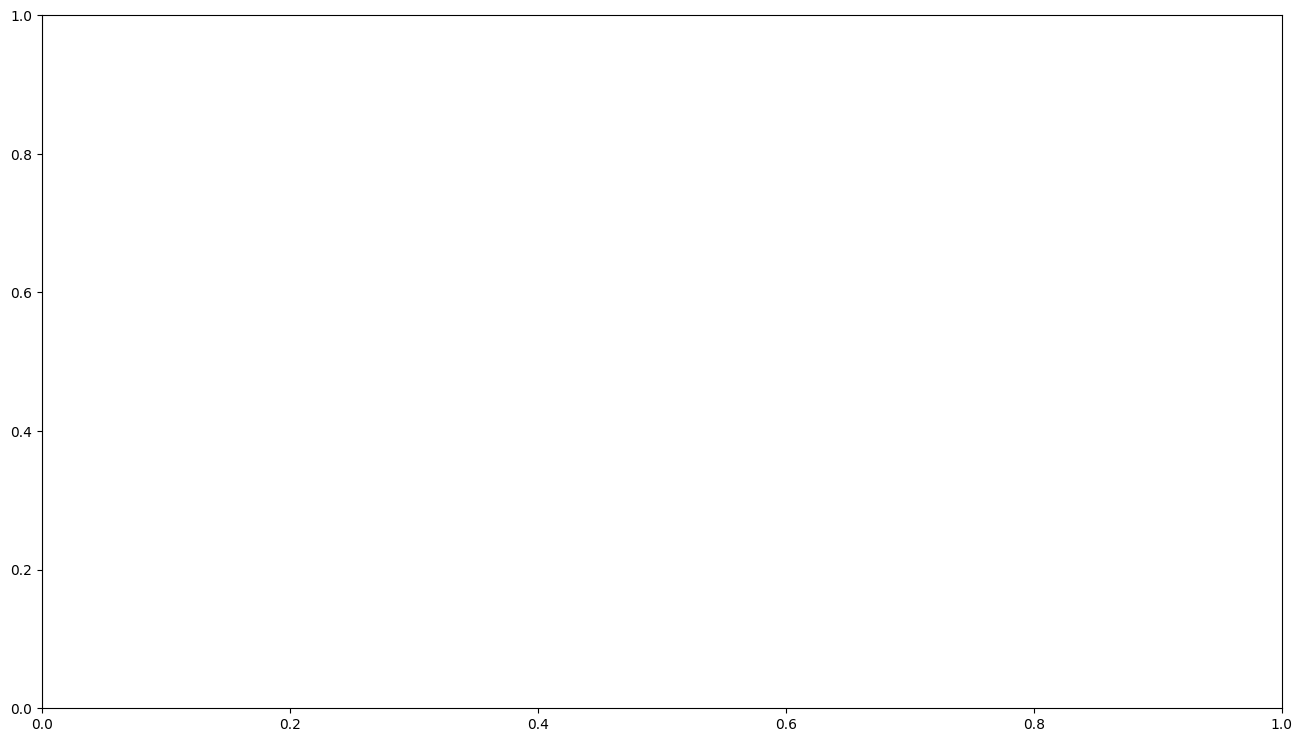

In [14]:
avg_shap_values = []
for fold in range(5):
    feature_path = '/home/pyq6817/IPMN-Radiomics-Plus-Deeplearning/radiomics'
    dataset_dtl_path = f'/home/pyq6817/IPMN-Radiomics-Plus-Deeplearning/{train_test_info}.json'
    radiomcis_model_dir = f'/home/pyq6817/IPMN-Radiomics-Plus-Deeplearning/radiomics/trained_models/{feature_dim}'
    radiomics_model = load(os.path.join(radiomcis_model_dir,f'{train_test_info}/{train_test_info}_Fold{fold+1}.joblib'))
    explainer = shap.TreeExplainer(radiomics_model)
    
    data = pd.read_csv(os.path.join(feature_path,f'Data/{feature_dim.upper()}_t2/all.csv'))
    data["Label"] = data['Label'].apply(lambda x: x-1)
    data["Name"] = data['Name'].str.replace(r'^IU_', 'IUC_', regex=True)
    x_test = get_x_test(dataset_dtl_path,fold,data,feature_list)
    shap_values = explainer.shap_values(x_test[:1])
    avg_shap_values.append(shap_values)
    
avg_shap_values = sum(avg_shap_values)/len(avg_shap_values)    
shap.summary_plot(avg_shap_values[:,:,1], x_test,plot_size=(16, 9),feature_names=feature_list,title=f'Test {4}, {3}D features',show=False)
# plt.savefig(f"/home/pyq6817/IPMN-Radiomics-Plus-Deeplearning/radiomics/SHAP_avg/{feature_dim}_{train_test_info}.png",bbox_inches="tight")
# plt.clf()

Load data

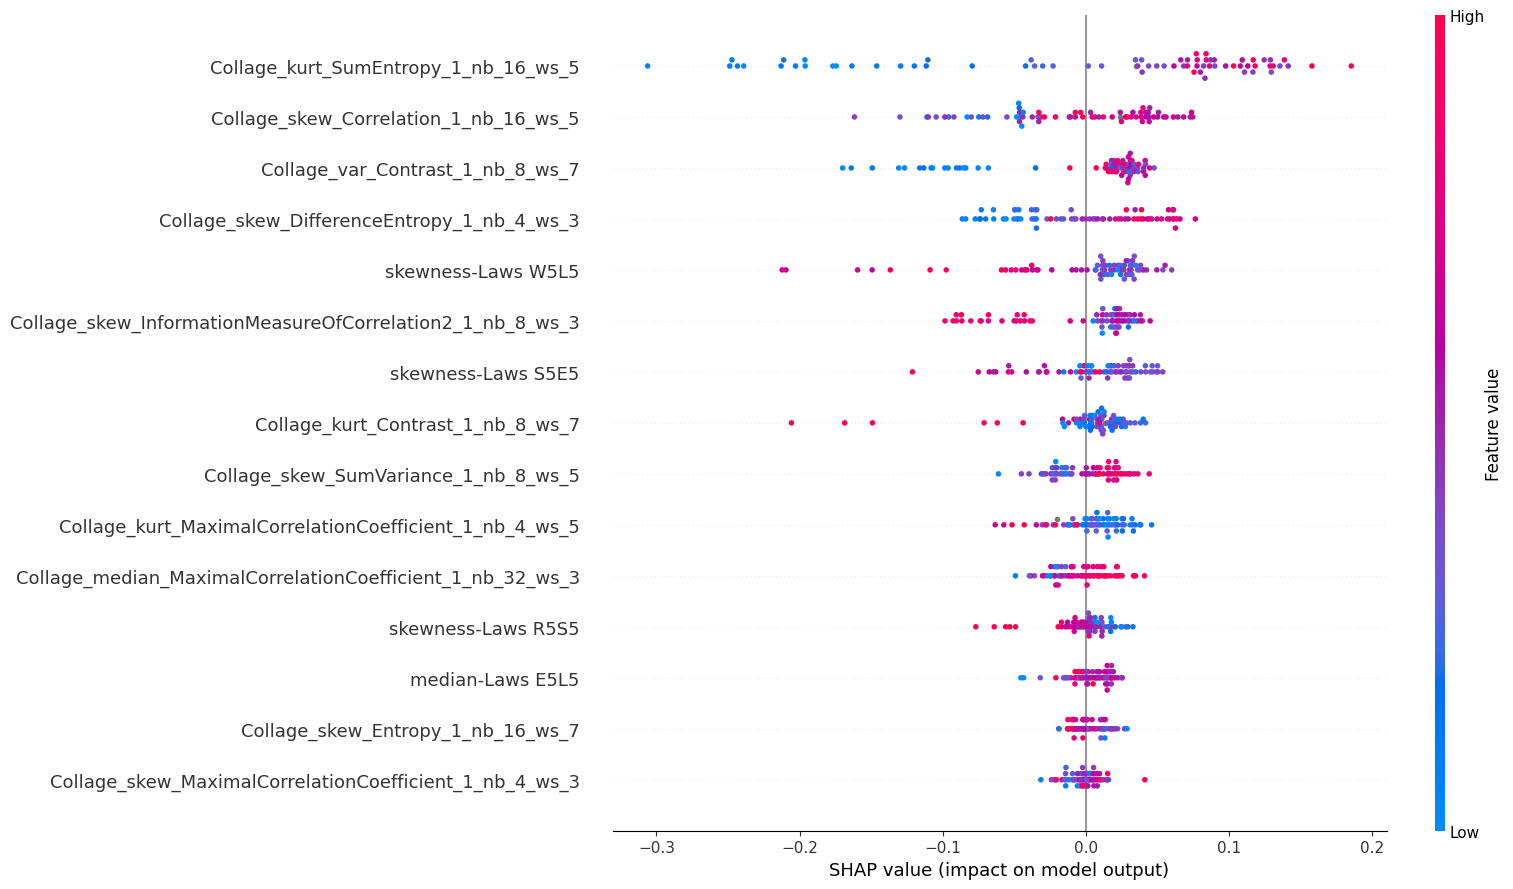

In [ ]:

shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[:,:,1], x_test,plot_size=(16, 9),show=False)
plt.show()
# plt.savefig(f"/home/pyq6817/IPMN-Radiomics-Plus-Deeplearning/radiomics/SHAP/{feature_dim}/{train_test_info}_fold{fold}.png",bbox_inches="tight")
# plt.clf()